Authors: Salvatore Mandra (salvatore.mandra@nasa.gov)<br>
&emsp;&emsp;&emsp;&emsp;Jeffrey Marshall (jeffrey.s.marshall@nasa.gov)

Copyright Â© 2021, United States Government, as represented by the Administrator
of the National Aeronautics and Space Administration. All rights reserved.

The *HybridQ: A Hybrid Simulator for Quantum Circuits* platform is licensed under
the Apache License, Version 2.0 (the "License"); you may not use this file
except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0. 

Unless required by applicable law or agreed to in writing, software distributed
under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR
CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.

In [1]:
from IPython.core.interactiveshell import InteractiveShell

# Plot output of every command
InteractiveShell.ast_node_interactivity = "all"

/home/dagart/local/miniconda3/envs/hybridq/lib/python3.8/site-packages/hybridq/extras/architecture/sycamore/__init__.py:25: DeprecationWarning: Importing from 'hybridq.extras.architecture.sycamore' is deprecated. Please use: 'hybridq.architecture.google.sycamore'
  warn(


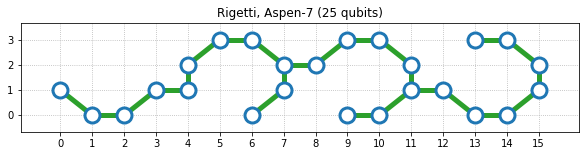

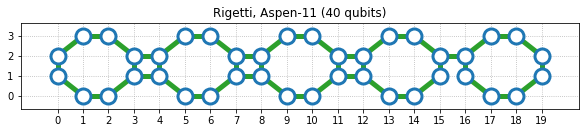

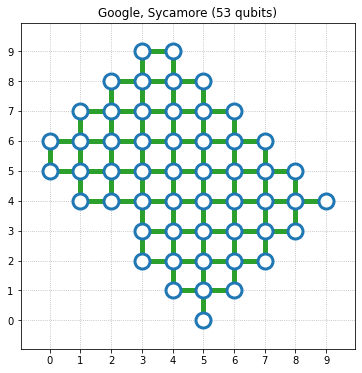

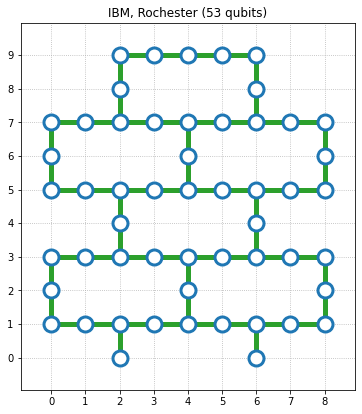

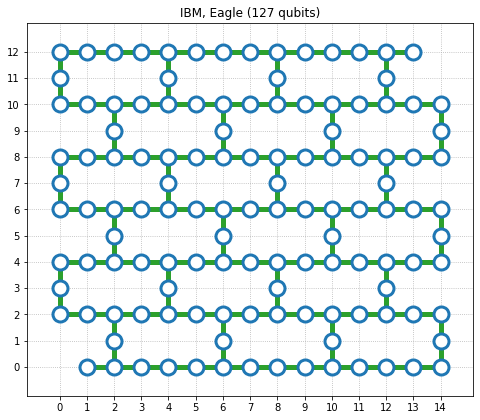

In [2]:
from hybridq.architecture.rigetti import *
from hybridq.architecture.google import *
from hybridq.architecture.ibm import *
from hybridq.architecture.plot import plot_qubits

# Plot Rigetti, Aspen-7
plot_qubits(aspen_7.layout,
            aspen_7.couplings,
            scale=10,
            title=f'Rigetti, Aspen-7 ({len(aspen_7.layout)} qubits)')

# Plot Rigetti, Aspen-11
plot_qubits(aspen_11.layout,
            aspen_11.couplings,
            scale=10,
            title=f'Rigetti, Aspen-11 ({len(aspen_11.layout)} qubits)')

# Plot Google, Sycamore
plot_qubits(sycamore.layout,
            sycamore.couplings,
            scale=6,
            title=f'Google, Sycamore ({len(sycamore.layout)} qubits)')

# Plot IBM, Rochester
plot_qubits(rochester.layout,
            rochester.couplings,
            scale=6,
            title=f'IBM, Rochester ({len(rochester.layout)} qubits)')

# Plot IBM, Eagle
plot_qubits(eagle.layout,
            eagle.couplings,
            scale=8,
            title=f'IBM, Eagle ({len(eagle.layout)} qubits)')

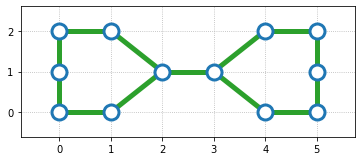

In [3]:
from hybridq.architecture.utils import get_layout_from_drawing as get_layout

# New layouts can be generated by providing a drawing of the qpu
bowtie_qpu = r"""
X-X     X-X
|  \   /  |
X   X-X   X
|  /   \  |
X-X     X-X
"""

# Plot Bow Tie Qpu
bowtie_qubits, bowtie_couplings = get_layout(bowtie_qpu)
plot_qubits(bowtie_qubits, bowtie_couplings)

In [4]:
from hybridq.circuit.simulation import simulate
from hybridq.gate import Gate
import numpy as np

# Generate random circuit
circuit = [
    Gate('FSIM', qubits=bowtie_couplings[x],
         params=np.random.random(size=2))**np.random.random()
    for x in np.random.randint(len(bowtie_couplings), size=100)
]

# Simulate circuit
psi = simulate(circuit,
               initial_state='+',
               simplify=False,
               compress=False,
               verbose=True)

# Print partial state
for x in range(10):
    # Get state
    s = bin(x)[2:].zfill(len(bowtie_qubits))
    
    # Get amplitude
    v = psi[tuple(map(int, s))]
    
    # Print
    print(f'{s}: {v:+1.6f}')

# Optimization: hybridq
Compress circuit (max_n_qubits=False): Done! (0.84s)


  0%|          | 0/100 [00:00<?, ?it/s]

000000000000: +0.015625+0.000000j
000000000001: -0.010243+0.001105j
000000000010: -0.021961+0.010077j
000000000011: +0.011856-0.001401j
000000000100: -0.000080-0.003076j
000000000101: +0.009197-0.005409j
000000000110: +0.014622-0.014717j
000000000111: -0.008237+0.015450j
000000001000: +0.002392+0.009918j
000000001001: +0.004813+0.000606j


# Runtime (s): 0.06
